In [1]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns

# Import module for data visualization
from plotnine import *
import plotnine

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 데이터 불러오기

In [2]:
df = pd.read_csv('data/MasterTable/MTF_비인도데프_20211108180730.csv')
df

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,위도,경도,서울구분,6억초과,규제,평당거주비용
0,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_1Q,60.000,199.500,2007.000,166.667,0.000,1.010,83.542,11.083,0.000,6.000,0.000,0.000,0,0,해당 없음,0.353
1,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_2Q,60.000,203.000,2007.000,166.667,1.754,0.000,82.102,11.278,2.000,0.000,0.000,0.000,0,0,해당 없음,0.364
2,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_3Q,60.000,200.667,2007.000,175.000,-1.149,5.000,87.209,11.148,3.000,3.000,0.000,0.000,0,0,해당 없음,0.364
3,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_4Q,60.000,209.000,2007.000,170.000,4.153,-2.857,81.340,11.611,1.000,2.000,0.000,0.000,0,0,조정대상지역,0.392
4,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2018_1Q,60.000,209.000,2007.000,170.000,0.000,0.000,81.340,11.611,4.000,3.000,0.000,0.000,0,0,조정대상지역,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380281,인천광역시 중구 항동7가_연안아파트_54,2020_2Q,54.000,229.278,1983.000,21.667,8.392,-5.797,9.450,14.330,18.000,4.000,0.000,0.000,0,0,해당 없음,0.363
380282,인천광역시 중구 항동7가_연안아파트_54,2020_3Q,54.000,210.000,1983.000,18.286,-8.408,-15.604,8.707,13.125,3.000,9.000,0.000,0.000,0,0,조정대상지역,0.318
380283,인천광역시 중구 항동7가_연안아파트_54,2020_4Q,54.000,204.692,1983.000,20.000,-2.527,9.375,9.771,12.793,13.000,2.000,0.000,0.000,0,0,조정대상지역,0.325
380284,인천광역시 중구 항동7가_연안아파트_54,2021_1Q,54.000,232.360,1983.000,20.333,13.517,1.667,8.751,14.523,25.000,5.000,0.000,0.000,0,0,조정대상지역,0.388


In [3]:
df.dropna(inplace=True)

# 데이터 전처리
- `서울구분`, `위도`, `경도` 삭제
- `6억초과` 값을 O, X 로 변경

In [4]:
# 서울구분, 위도, 경도 삭제
df.drop(['위도','경도'],axis=1,inplace=True)

# 6억초과 값 변경
df.loc[df['6억초과']==0,'6억초과']= 'X'
df.loc[df['6억초과']==1,'6억초과']= 'O'
df.loc[df['서울구분']==0,'서울구분']= 'X'
df.loc[df['서울구분']==1,'서울구분']= 'O'
df

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,서울구분,6억초과,규제,평당거주비용
0,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_1Q,60.000,199.500,2007.000,166.667,0.000,1.010,83.542,11.083,0.000,6.000,X,X,해당 없음,0.353
1,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_2Q,60.000,203.000,2007.000,166.667,1.754,0.000,82.102,11.278,2.000,0.000,X,X,해당 없음,0.364
2,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_3Q,60.000,200.667,2007.000,175.000,-1.149,5.000,87.209,11.148,3.000,3.000,X,X,해당 없음,0.364
3,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2017_4Q,60.000,209.000,2007.000,170.000,4.153,-2.857,81.340,11.611,1.000,2.000,X,X,조정대상지역,0.392
4,경기도 고양덕양구 고양동_고양동우방유쉘아파트_60,2018_1Q,60.000,209.000,2007.000,170.000,0.000,0.000,81.340,11.611,4.000,3.000,X,X,조정대상지역,0.402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380281,인천광역시 중구 항동7가_연안아파트_54,2020_2Q,54.000,229.278,1983.000,21.667,8.392,-5.797,9.450,14.330,18.000,4.000,X,X,해당 없음,0.363
380282,인천광역시 중구 항동7가_연안아파트_54,2020_3Q,54.000,210.000,1983.000,18.286,-8.408,-15.604,8.707,13.125,3.000,9.000,X,X,조정대상지역,0.318
380283,인천광역시 중구 항동7가_연안아파트_54,2020_4Q,54.000,204.692,1983.000,20.000,-2.527,9.375,9.771,12.793,13.000,2.000,X,X,조정대상지역,0.325
380284,인천광역시 중구 항동7가_연안아파트_54,2021_1Q,54.000,232.360,1983.000,20.333,13.517,1.667,8.751,14.523,25.000,5.000,X,X,조정대상지역,0.388


In [5]:
# 분기 리스트
list_quarter = ['2017_1Q','2017_2Q','2017_3Q','2017_4Q','2018_1Q','2018_2Q','2018_3Q','2018_4Q',
                '2019_1Q','2019_2Q','2019_3Q','2019_4Q','2020_1Q','2020_2Q','2020_3Q','2020_4Q','2021_1Q','2021_2Q']

# 분기별 테이블 생성
for i in list_quarter:
    globals()['df_{}'.format(i)] = df[df['quarter']== i]

In [6]:
# Get the position of categorical columns
catColumnsPos = [df_2017_1Q.columns.get_loc(col) for col in list(df_2017_1Q.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_2017_1Q.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['id', 'quarter', '서울구분', '6억초과', '규제']
Categorical columns position  : [0, 1, 12, 13, 14]


# Elbow Method

In [7]:
# 데이터 자료형 변경
df_2017_1Q.서울구분 = df_2017_1Q.서울구분.astype(str)
df_2017_1Q['6억초과'] = df_2017_1Q['6억초과'].astype(str)
df_2017_1Q.규제 = df_2017_1Q.규제.astype(str)

C:\Users\medici\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-7-600be80e3a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# id, quarter 제거
d = df_2017_1Q.drop(['id','quarter'], axis=1)

# 리인덱싱
d.reset_index(drop=True, inplace=True)
d

,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,전세빈도,서울구분,6억초과,규제,평당거주비용
0,60.000,199.500,2007.000,166.667,0.000,1.010,83.542,11.083,0.000,6.000,X,X,해당 없음,0.353
1,85.000,242.500,2007.000,199.167,-2.316,4.825,82.131,9.327,2.000,7.000,X,X,해당 없음,0.297
2,60.000,181.000,1998.000,140.000,1.972,0.000,77.348,10.056,3.000,0.000,X,X,해당 없음,0.320
3,85.000,217.500,1998.000,180.000,8.209,5.882,82.759,8.365,2.000,2.000,X,X,해당 없음,0.267
4,59.000,141.500,1997.000,125.000,0.000,13.636,88.339,7.861,0.000,1.000,X,X,해당 없음,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21122,72.000,120.000,1981.000,95.000,0.000,18.012,79.167,5.455,0.000,2.000,X,X,해당 없음,0.174
21123,126.000,189.000,1990.000,100.000,0.000,0.000,52.910,4.974,0.000,0.000,X,X,해당 없음,0.158
21124,164.000,241.667,1990.000,100.000,0.000,0.000,41.379,4.932,0.000,0.000,X,X,해당 없음,0.157
21125,85.000,148.250,1990.000,90.000,-6.761,0.000,60.708,5.702,4.000,2.000,X,X,해당 없음,0.182


In [9]:
# Get the position of categorical columns
catColumnsPos = [d.columns.get_loc(col) for col in list(d.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(d.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['서울구분', '6억초과', '규제']
Categorical columns position  : [10, 11, 12]


Best run was number 1
Cluster initiation: 1
Best run was number 8
Cluster initiation: 2
Best run was number 8
Cluster initiation: 3
Best run was number 10
Cluster initiation: 4
Best run was number 10
Cluster initiation: 5
Best run was number 7
Cluster initiation: 6
Best run was number 2
Cluster initiation: 7
Best run was number 8
Cluster initiation: 8
Best run was number 4
Cluster initiation: 9
Best run was number 10
Cluster initiation: 10
Best run was number 3
Cluster initiation: 11
Best run was number 3
Cluster initiation: 12
Best run was number 9
Cluster initiation: 13
Best run was number 8
Cluster initiation: 14


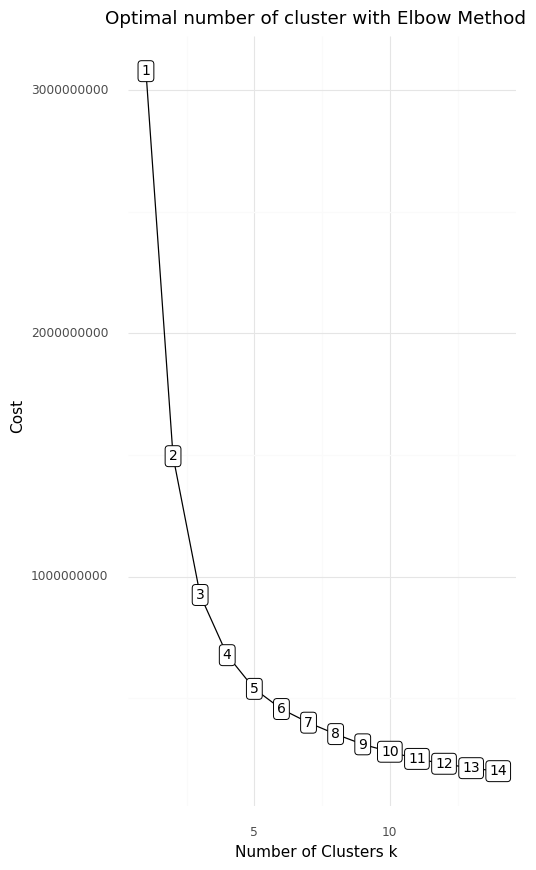

<ggplot: (115832581714)>

In [70]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 15):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, random_state = 42, verbose=1)
        kprototype.fit_predict(d, categorical = [10,11,12])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 15), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (5, 10)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

# K-prototypes

In [11]:
# 분기 리스트
list_quarter = ['2017_1Q','2017_2Q','2017_3Q','2017_4Q','2018_1Q','2018_2Q','2018_3Q','2018_4Q',
                '2019_1Q','2019_2Q','2019_3Q','2019_4Q','2020_1Q','2020_2Q','2020_3Q','2020_4Q','2021_1Q','2021_2Q']

# 분기별 테이블 생성
for i in list_quarter:
    globals()['df_{}'.format(i)] = df[df['quarter']== i]

# K-prototypes 
kproto = KPrototypes(n_clusters=7,random_state=42, verbose=1,max_iter=100)
kproto.fit(df_2017_1Q.iloc[:,2:], categorical = [10,11,12])

# 분기별 테이블 군집화
for i in list_quarter:
    globals()['clusters_{}'.format(i)] = kproto.predict(globals()['df_{}'.format(i)].iloc[:,2:], categorical = [10,11,12])
    globals()['df_{}'.format(i)]['cluster'] = globals()['clusters_{}'.format(i)]    

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8189, ncost: 497415612.54556334
Run: 1, iteration: 2/100, moves: 1548, ncost: 480331904.9138805
Run: 1, iteration: 3/100, moves: 994, ncost: 468921608.95133334
Run: 1, iteration: 4/100, moves: 738, ncost: 457470250.7642246
Run: 1, iteration: 5/100, moves: 723, ncost: 445134633.09920216
Run: 1, iteration: 6/100, moves: 833, ncost: 433576603.7196214
Run: 1, iteration: 7/100, moves: 847, ncost: 425896587.2034561
Run: 1, iteration: 8/100, moves: 749, ncost: 422325297.27129924
Run: 1, iteration: 9/100, moves: 749, ncost: 419590911.98355556
Run: 1, iteration: 10/100, moves: 708, ncost: 417531158.3718764
Run: 1, iteration: 11/100, moves: 659, ncost: 41603534

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 3201, ncost: 489644382.89655
Run: 5, iteration: 2/100, moves: 892, ncost: 459340024.9598304
Run: 5, iteration: 3/100, moves: 589, ncost: 447553699.3891842
Run: 5, iteration: 4/100, moves: 461, ncost: 439783611.2507453
Run: 5, iteration: 5/100, moves: 496, ncost: 430722671.59665644
Run: 5, iteration: 6/100, moves: 524, ncost: 422155434.5853125
Run: 5, iteration: 7/100, moves: 615, ncost: 413471361.1873822
Run: 5, iteration: 8/100, moves: 601, ncost: 407330377.68157285
Run: 5, iteration: 9/100, moves: 605, ncost: 404134320.3773582
Run: 5, iteration: 10/100, moves: 485, ncost: 402210809.708556
Run: 5, iteration: 11/100, moves: 366, ncost: 401194408.0173876
Run: 5, iteration: 12/100, moves: 305, ncost: 400449750.3899388
Run: 5, iteration: 13/100, moves: 239, ncost: 399904118.3647307
Run: 5, iteration: 14/100, moves: 210, n

Run: 9, iteration: 11/100, moves: 849, ncost: 419261628.7109034
Run: 9, iteration: 12/100, moves: 799, ncost: 411767059.0665832
Run: 9, iteration: 13/100, moves: 764, ncost: 406967461.5045968
Run: 9, iteration: 14/100, moves: 712, ncost: 404193456.41960305
Run: 9, iteration: 15/100, moves: 582, ncost: 402275050.3057517
Run: 9, iteration: 16/100, moves: 381, ncost: 401272024.6268097
Run: 9, iteration: 17/100, moves: 330, ncost: 400502664.9370513
Run: 9, iteration: 18/100, moves: 248, ncost: 399931355.007146
Run: 9, iteration: 19/100, moves: 220, ncost: 399740555.24652344
Run: 9, iteration: 20/100, moves: 179, ncost: 399594250.4768098
Run: 9, iteration: 21/100, moves: 147, ncost: 399492688.37124515
Run: 9, iteration: 22/100, moves: 126, ncost: 399392923.91766626
Run: 9, iteration: 23/100, moves: 98, ncost: 399347929.9670608
Run: 9, iteration: 24/100, moves: 114, ncost: 399293608.84711695
Run: 9, iteration: 25/100, moves: 110, ncost: 399239395.9151029
Run: 9, iteration: 26/100, moves: 55,

<ipython-input-11-07deb5aacd9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-11-07deb5aacd9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-11-07deb5aacd9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-11-07deb5aacd

# 혹시 몰라 저장하기

In [6]:
# 혹시 몰라 데이터 저장
for i in list_quarter:
    globals()['df_{}'.format(i)].to_csv('data/cluster/df_'+ i+'.csv', index=False, encoding='utf-8-sig')
#     globals()['clusters_{}'.format(i)].to_csv('data/cluster/clusters_'+i+'.csv', index=False, encoding='utf-8-sig')

---

# 저장하고 나서 여기서부터 시작해도 됨

In [58]:
# 다시 불러오기
for i in list_quarter:
    globals()['df_{}'.format(i)] = pd.read_csv('data/cluster/df_'+ i+'.csv')
#     globals()['clusters_{}'.format(i)] = pd.read_csv('data/cluster/clusters_'+i+'.csv')

In [7]:
# 분기별 테이블 군집화
for i in list_quarter:
    df_temp = globals()['df_{}'.format(i)].copy()
    idx5 = df_temp.loc[df_temp.cluster == 5].index.tolist()
    idx1 = df_temp.loc[df_temp.cluster == 1].index.tolist()
    idx0 = df_temp.loc[df_temp.cluster == 0].index.tolist()
    idx3 = df_temp.loc[df_temp.cluster == 3].index.tolist()
    idx2 = df_temp.loc[df_temp.cluster == 2].index.tolist()
    idx4 = df_temp.loc[df_temp.cluster == 4].index.tolist()
    
    df_temp.loc[idx5, 'cluster'] = 5
    df_temp.loc[idx1, 'cluster'] = 4
    df_temp.loc[idx0, 'cluster'] = 3
    df_temp.loc[idx3, 'cluster'] = 2
    df_temp.loc[idx2, 'cluster'] = 1
    df_temp.loc[idx4, 'cluster'] = 0
    
    globals()['df_{}'.format(i)] = df_temp
    globals()['clusters_{}'.format(i)] = pd.Series.to_numpy(df_temp.cluster)


# 분기에 따른 군집이동 테이블 생성

In [9]:
# id 테이블
df_id = df['id']
df_id.drop_duplicates(keep='first',inplace=True)    # 중복제거
df_id.reset_index(drop=True, inplace=True)          # 리인덱싱
df_id = pd.DataFrame(df_id)                         # 데이터프레임으로 전환 
df_id

,id
0,가곡리_598_신마석신도브래뉴_85
1,가능동_106-16_녹양2차동원아파트_52
2,가능동_106-16_녹양2차동원아파트_64
3,가능동_106-16_녹양2차동원아파트_73
4,가능동_106-21_동원_60
...,...
19729,흥인동_13-1_청계천 두산위브더제니스_117
19730,흥인동_13-1_청계천 두산위브더제니스_124
19731,흥인동_13-1_청계천 두산위브더제니스_125
19732,흥인동_13-1_청계천 두산위브더제니스_148


In [10]:
# 컬럼추가
for i in list_quarter:
    df_id[str(i)] =  globals()['clusters_{}'.format(i)]

# 군집 이동 데이터 저장

In [11]:
# 데이터 저장
df_id.to_csv('data/cluster/clust_1st.csv', index=False, encoding='utf-8-sig')

---

# 1차군집 붙인 마스터 테이블 저장하기

In [3]:
# 다시 불러오기

list_quarter = ['2017_1Q','2017_2Q','2017_3Q','2017_4Q','2018_1Q','2018_2Q','2018_3Q','2018_4Q',
                '2019_1Q','2019_2Q','2019_3Q','2019_4Q','2020_1Q','2020_2Q','2020_3Q','2020_4Q','2021_1Q','2021_2Q']
for i in list_quarter:
    globals()[
        'df_{}'.format(i)] = pd.read_csv('data/cluster/df_'+ i+'.csv')

In [13]:
# 모든 분기 데이터프레임 이어 붙이기
df = pd.concat(list(globals()['df_{}'.format(i)] for i in list_quarter))
df.sort_values(['id','quarter'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,6억초과,규제,평당거주비용,cluster
0,가곡리_598_신마석신도브래뉴_85,2017_1Q,85.0,199.000000,2008.0,155.0,0.759494,-3.125000,77.889447,7.653846,1.0,X,해당 없음,0.243903,4
1,가곡리_598_신마석신도브래뉴_85,2017_2Q,85.0,195.916667,2008.0,160.0,-1.549414,3.225806,81.667376,7.535256,6.0,X,해당 없음,0.243389,4
2,가곡리_598_신마석신도브래뉴_85,2017_3Q,85.0,197.100000,2008.0,165.0,0.603998,3.125000,83.713851,7.580769,10.0,X,해당 없음,0.247638,4
3,가곡리_598_신마석신도브래뉴_85,2017_4Q,85.0,203.542857,2008.0,170.0,3.268827,3.030303,83.520494,7.828571,7.0,X,조정대상지역,0.264606,4
4,가곡리_598_신마석신도브래뉴_85,2018_1Q,85.0,183.000000,2008.0,150.0,-10.092645,-11.764706,81.967213,7.038462,1.0,X,조정대상지역,0.243531,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355207,흥인동_13-1_청계천 두산위브더제니스_93,2020_2Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,O,투기지구,0.980375,0
355208,흥인동_13-1_청계천 두산위브더제니스_93,2020_3Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,O,투기지구,0.940333,0
355209,흥인동_13-1_청계천 두산위브더제니스_93,2020_4Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,O,투기지구,0.984250,0
355210,흥인동_13-1_청계천 두산위브더제니스_93,2021_1Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,O,투기지구,1.035917,0


In [36]:
# 저장하기
df.to_csv('data/cluster/MasterTable with 1st cluster_비인도데프.csv', index=False, encoding='utf-8-sig')